<a href="https://colab.research.google.com/github/mozzarifa/folium_project_n3ts/blob/main/Mozzarifa_Putri_Prayoga_X5_Kota_Palembang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

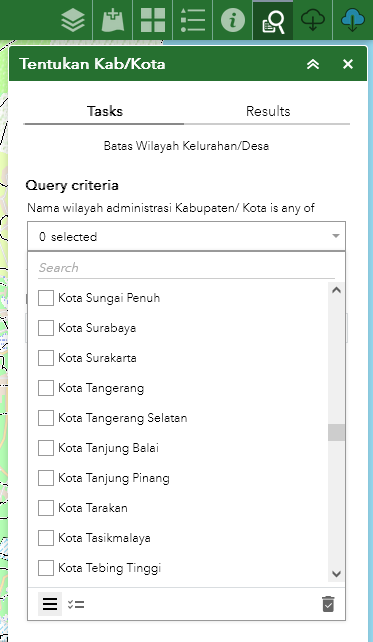

In [12]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Palembang']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# CSV file path
csv_path = '/content/drive/MyDrive/Jumlah Penduduk Palembang, 2019-2021.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kecamatan'] = csv_data['Kecamatan'].str.lower().str.replace(' ', '')
admin_gdf['WADMKC'] = admin_gdf['WADMKC'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['WADMKC'] = admin_gdf['WADMKC'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kecamatan'] = csv_data['Kecamatan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='WADMKC', right_on='Kecamatan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

           Kecamatan   2019   2020   2021
0     Ilir Barat Dua  73269  67645  67654
1             Gandus  65781  72154  75450
2  Seberang Ulu Satu  95251  90914  91697
3          Kertapati  92082  90977  92407
4         Jakabaring  92141  90384  90942
       OBJECTID        NAMOBJ       FCODE REMARK  \
10249   10250.0     Satu Ilir  BA03070040   None   
10250   10251.0      Satu Ulu  BA03070040   None   
10251   10252.0  Sepuluh Ilir  BA03070040   None   
10252   10253.0  Sebelas Ilir  BA03070040   None   
10253   10254.0   Sebelas Ulu  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
10249  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
10250  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
10251  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
10252  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
10253  TASWIL1000020230928_DATA_BAT

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
# Create a base map
m = folium.Map(location=[-6.3, 106.7], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kecamatan", "2021"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="2021"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='2021',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','2021'],
        aliases=['Kecamatan','2021']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [17]:
# Create a base map
m = folium.Map(location=[-2.9549685,104.7629646], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Jumlah KK Kecamtan Palembang",
    data=merged_gdf,
    columns=["Kecamatan", "2021"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="2021"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('sman_palembang.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Palembang")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='2021',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','2021'],
        aliases=['Kecamatan','2021']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: Kecamatan Sukarami.

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab: Kecamatan Ilir Barat Dua, Seberang Ulu Satu, Jakabaring, Seberang Ulu Dua, Plaju, Bukitkecil, Ilir Timur Satu, Kalidoni, Ilir Timur Tiga, Sako, Sematangborang, Alang-Alang Lebar.